In [1]:
# dependency 
import pandas as pd

# read the csv as df and add the new columns where county names without 'city' and 'county' is placed
df = pd.read_csv('../hospital_charges_numeric.csv')
df['cleaned_HRRD'] = df['Hospital Referral Region Description'].str.replace(" City", "").str.replace(" County", "")
df.head()

,Unnamed: 0,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,cleaned_HRRD
0,0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,AL - Dothan
1,1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,AL - Birmingham
2,2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,AL - Birmingham
3,3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,AL - Birmingham
4,4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,AL - Birmingham


In [3]:
# create the new df to convert states name to 2 characters abbreviation
states = ["Alaska","Alabama","Arkansas","American Samoa","Arizona","California","Colorado","Connecticut","District of Columbia","Delaware","Florida","Georgia","Guam","Hawaii","Iowa","Idaho","Illinois","Indiana","Kansas","Kentucky","Louisiana","Massachusetts","Maryland","Maine","Michigan","Minnesota","Missouri","Mississippi","Montana","North Carolina","North Dakota","Nebraska","New Hampshire","New Jersey","New Mexico","Nevada","New York","Ohio","Oklahoma","Oregon","Pennsylvania","Puerto Rico","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Virginia","Virgin Islands","Vermont","Washington","Wisconsin","West Virginia","Wyoming"]
abbr = ["AK","AL","AR","AS","AZ","CA","CO","CT","DC","DE","FL","GA","GU","HI","IA","ID","IL","IN","KS","KY","LA","MA","MD","ME","MI","MN","MO","MS","MT","NC","ND","NE","NH","NJ","NM","NV","NY","OH","OK","OR","PA","PR","RI","SC","SD","TN","TX","UT","VA","VI","VT","WA","WI","WV","WY"]
convStates = pd.DataFrame({'State':states, 'Abbr':abbr})
convStates.head()

,Abbr,State
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas
3,AS,American Samoa
4,AZ,Arizona


In [4]:
# read income csv as df and convert string to float
df_income = pd.read_csv("../County income.csv",encoding='iso-8859-1')
df_income['cleaned_CE'] = df_income['County-equivalent'].str.replace(" City", "").str.replace(" County", "")
df_income['Per capita income'] = df_income['Per capita income'].str.replace('$','').str.replace(',','').astype(float)
df_income['Median household income'] = df_income['Median household income'].str.replace('$','').str.replace(',','').astype(float)
df_income['Median family income'] = df_income['Median family income'].str.replace('$','').str.replace(',','').astype(float)
df_income['Population'] = df_income['Population'].str.replace('$','').str.replace(',','').astype(float)
df_income['Number of households'] = df_income['Number of households'].str.replace('$','').str.replace(',','').astype(float)
df_income.head()

,Rank,County-equivalent,State,Per capita income,Median household income,Median family income,Population,Number of households,cleaned_CE
0,1,New York County,New York,62498.0,69659.0,84627.0,1605272.0,736192.0,New York
1,2,Arlington,Virginia,62018.0,103208.0,139244.0,214861.0,94454.0,Arlington
2,3,Falls Church City,Virginia,59088.0,120000.0,152857.0,12731.0,5020.0,Falls Church
3,4,Marin,California,56791.0,90839.0,117357.0,254643.0,102912.0,Marin
4,5,Alexandria City,Virginia,54608.0,85706.0,107511.0,143684.0,65369.0,Alexandria


In [5]:
# merge income df and state_abbreviation df then add the new column where county names without 'city' and 'county' is placed
df_income_state = pd.merge(df_income, convStates, how = 'outer')
df_income_state['cleaned_HRRD'] = df_income_state['Abbr'] + ' - ' + df_income_state['cleaned_CE']
df_income_state.head()


,Rank,County-equivalent,State,Per capita income,Median household income,Median family income,Population,Number of households,cleaned_CE,Abbr,cleaned_HRRD
0,1,New York County,New York,62498.0,69659.0,84627.0,1605272.0,736192.0,New York,NY,NY - New York
1,16,Westchester,New York,47984.0,81946.0,105341.0,956283.0,343561.0,Westchester,NY,NY - Westchester
2,33,Nassau,New York,42400.0,97690.0,112874.0,1343765.0,441955.0,Nassau,NY,NY - Nassau
3,43,Putnam,New York,40309.0,95117.0,109188.0,99718.0,34496.0,Putnam,NY,NY - Putnam
4,85,Suffolk,New York,36945.0,87763.0,100652.0,1495803.0,497347.0,Suffolk,NY,NY - Suffolk


In [6]:
# merge income df and original df and output it as csv
df_merged_income = pd.merge(df, df_income_state, how = "outer").dropna(subset=['Rank','Provider State'])
df_merged_income.to_csv('Income_merged.csv')
df_merged_income.head()

,Unnamed: 0,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,...,Rank,County-equivalent,State,Per capita income,Median household income,Median family income,Population,Number of households,cleaned_CE,Abbr
2221,5.0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023.0,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116.0,AL - Montgomery,67.0,...,1054,Montgomery,Alabama,24975.0,44790.0,56684.0,228980.0,88844.0,Montgomery,AL
2222,1081.0,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,10023.0,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116.0,AL - Montgomery,17.0,...,1054,Montgomery,Alabama,24975.0,44790.0,56684.0,228980.0,88844.0,Montgomery,AL
2223,1082.0,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,10024.0,JACKSON HOSPITAL & CLINIC INC,1725 PINE STREET,MONTGOMERY,AL,36106.0,AL - Montgomery,19.0,...,1054,Montgomery,Alabama,24975.0,44790.0,56684.0,228980.0,88844.0,Montgomery,AL
2224,1763.0,069 - TRANSIENT ISCHEMIA,10047.0,GEORGIANA HOSPITAL,515 MIRANDA ST,GEORGIANA,AL,36033.0,AL - Montgomery,32.0,...,1054,Montgomery,Alabama,24975.0,44790.0,56684.0,228980.0,88844.0,Montgomery,AL
2225,2289.0,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10023.0,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116.0,AL - Montgomery,48.0,...,1054,Montgomery,Alabama,24975.0,44790.0,56684.0,228980.0,88844.0,Montgomery,AL


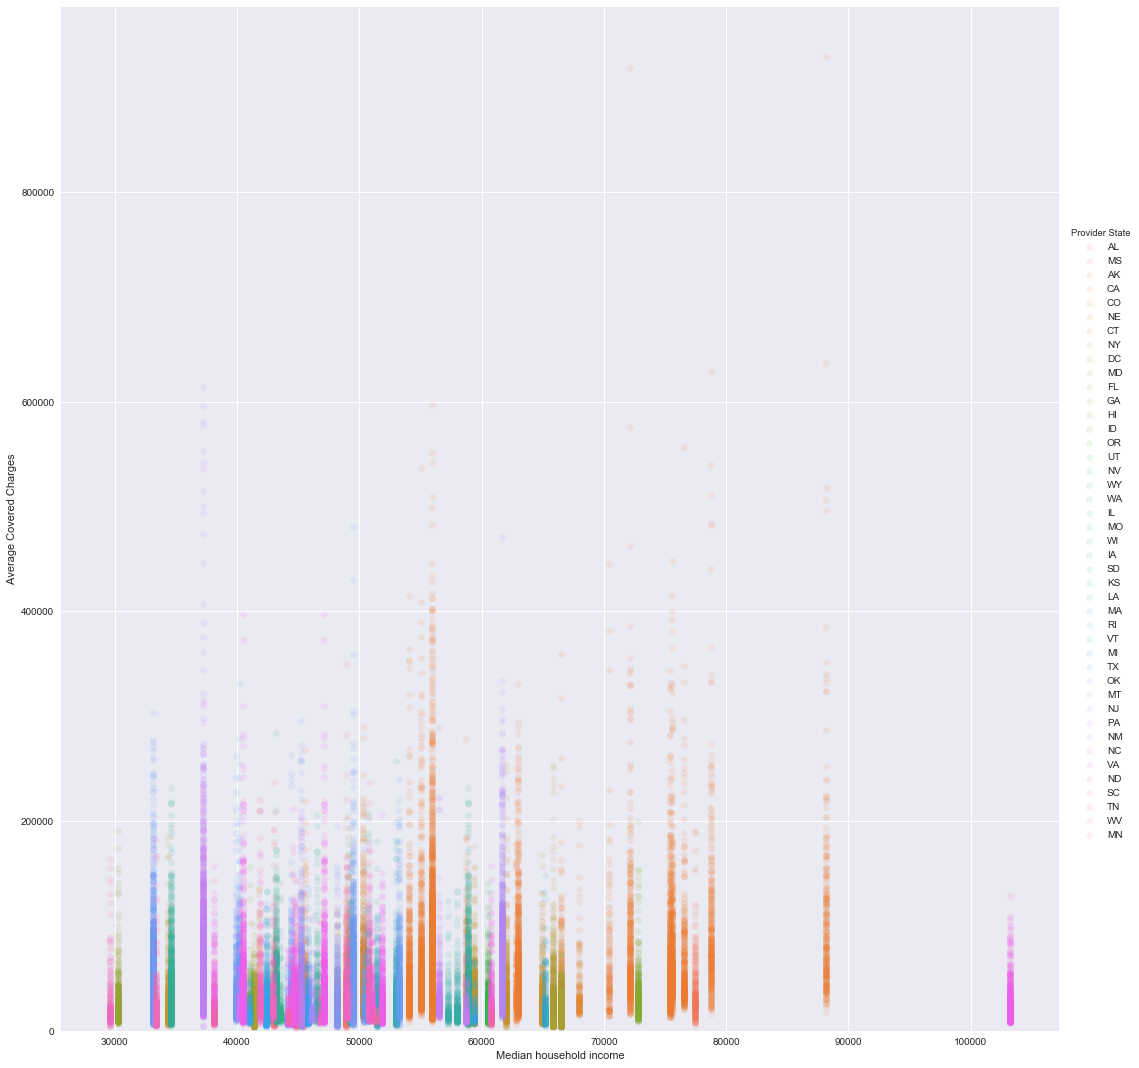

In [7]:
# draw the scatter plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.lmplot(x='Median household income', y=" Average Covered Charges ", hue="Provider State", data=df_merged_income, fit_reg=False, legend=True, size = 15, scatter_kws={'alpha':0.1})
plt.ylim(0,)
plt.savefig('income_charge.png')
plt.show()

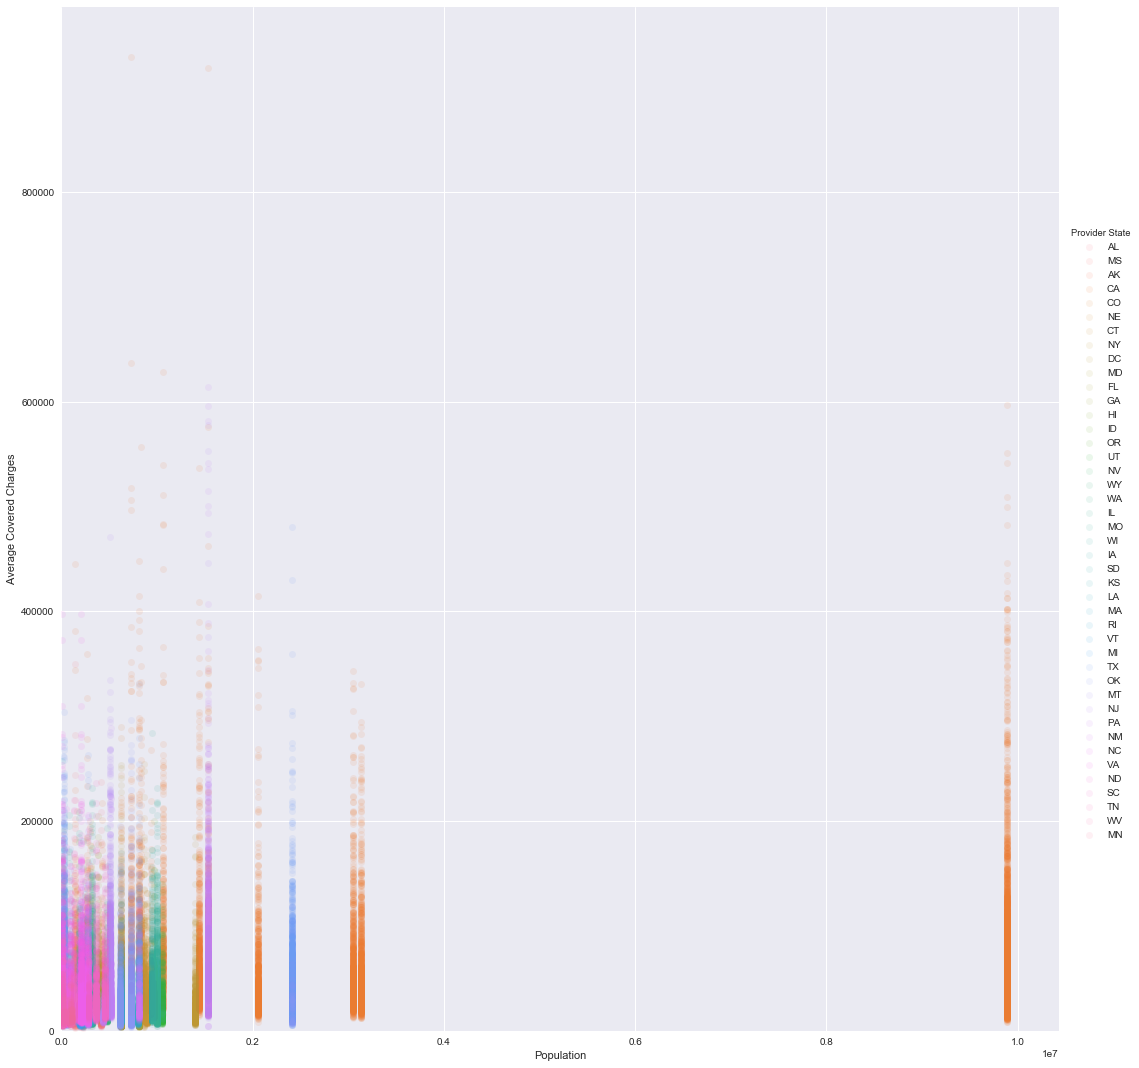

In [8]:
sns.lmplot(x='Population', y=" Average Covered Charges ", hue="Provider State", data=df_merged_income, fit_reg=False, legend=True, size=15,scatter_kws={'alpha':0.1})
plt.ylim(0,)
plt.xlim(0,)
plt.show()

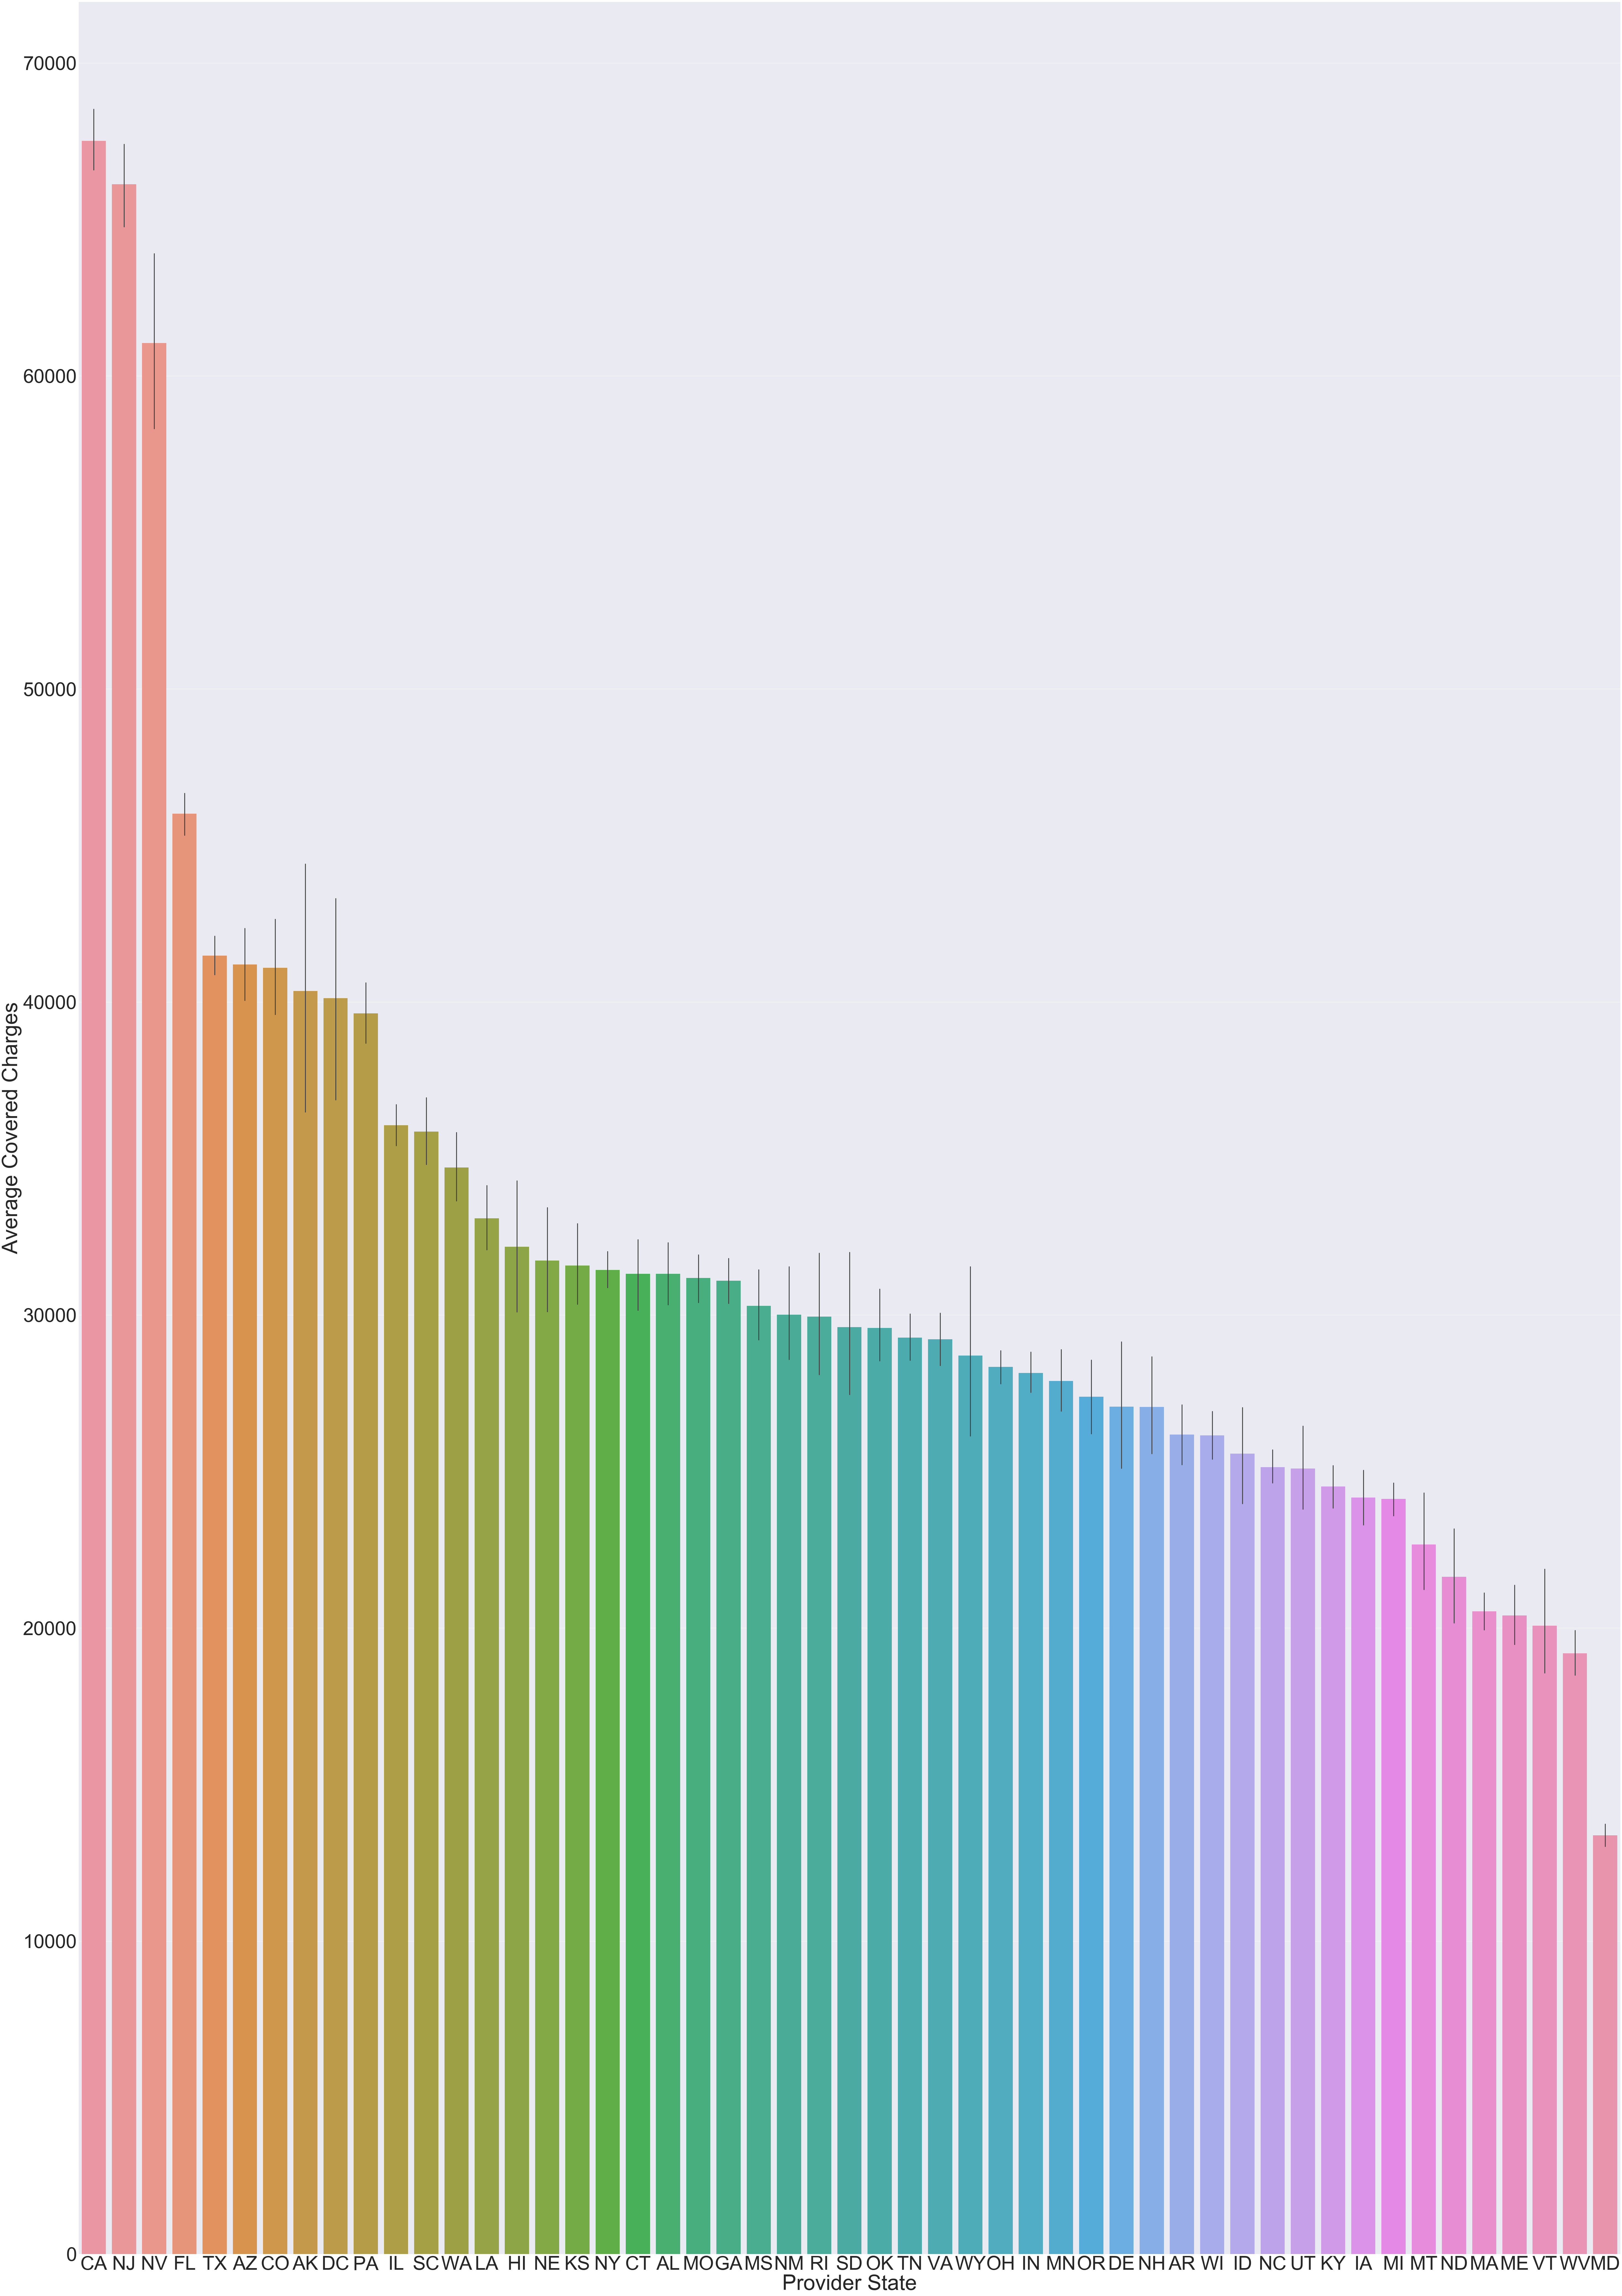

In [10]:
states = df.groupby('Provider State').mean().sort_values(by=[' Average Covered Charges '], ascending=False).index
sns.barplot(x='Provider State', y=' Average Covered Charges ', data=df, order=states)
sns.set(rc={'figure.figsize':(100,150)}, font_scale=7)
# plt.savefig('state_charge.png')
plt.show()